<a href="https://colab.research.google.com/github/iupui-soic/pybootcamp/blob/main/Copy_of_Pallavi_SinghINPC_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MIMIC Dataset

In [14]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [15]:
import pandas as pd
df_patients=pd.read_csv('/content/gdrive/MyDrive/mimic-iv/patients.csv.gz')

In [55]:
df_patients

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,F,52,2180,2014 - 2016,2180-09-09
1,10000048,F,23,2126,2008 - 2010,NaN
2,10000068,F,19,2160,2008 - 2010,NaN
3,10000084,M,72,2160,2017 - 2019,2161-02-13
4,10000102,F,27,2136,2008 - 2010,NaN
...,...,...,...,...,...,...
299772,19999828,F,46,2147,2017 - 2019,NaN
299773,19999829,F,28,2186,2008 - 2010,NaN
299774,19999840,M,58,2164,2008 - 2010,2164-09-17
299775,19999914,F,49,2158,2017 - 2019,NaN


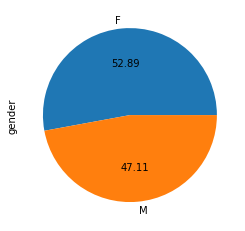

In [56]:
# biological sex for patients
df_patients['gender'].value_counts().plot(kind='pie', autopct='%.2f')

(array([55462., 35872., 27628., 29625., 30727., 31342., 31959., 21653.,
        17640., 17869.]),
 array([18. , 25.3, 32.6, 39.9, 47.2, 54.5, 61.8, 69.1, 76.4, 83.7, 91. ]),
 <a list of 10 Patch objects>)

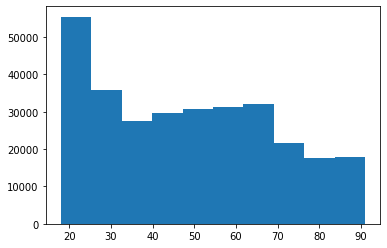

In [58]:
# approx age distribution of patients
import matplotlib.pyplot as plt
plt.hist(df_patients['anchor_age'])

(array([ 220.,  351.,  457., 1077., 2016., 3054., 4580., 4500., 5226.,
        7607.]),
 array([18. , 25.3, 32.6, 39.9, 47.2, 54.5, 61.8, 69.1, 76.4, 83.7, 91. ]),
 <a list of 10 Patch objects>)

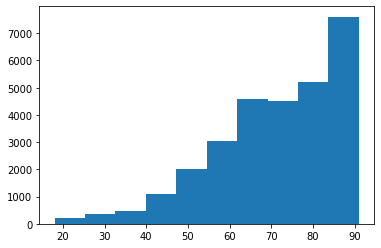

In [59]:
# approx age distribution of dead patients
plt.hist(df_patients[df_patients['dod'].notnull()]['anchor_age'])
     

In [16]:
df_admissions=pd.read_csv('/content/gdrive/MyDrive/mimic-iv/admissions.csv.gz')

In [60]:
df_admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431088 entries, 0 to 431087
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   subject_id            431088 non-null  int64  
 1   hadm_id               431088 non-null  int64  
 2   admittime             431088 non-null  object 
 3   dischtime             431088 non-null  object 
 4   deathtime             8625 non-null    object 
 5   admission_type        431088 non-null  object 
 6   admission_location    431088 non-null  object 
 7   discharge_location    311774 non-null  object 
 8   insurance             431088 non-null  object 
 9   language              431088 non-null  object 
 10  marital_status        421868 non-null  object 
 11  race                  431088 non-null  object 
 12  edregtime             299260 non-null  object 
 13  edouttime             299260 non-null  object 
 14  hospital_expire_flag  431088 non-null  int64  
 15  

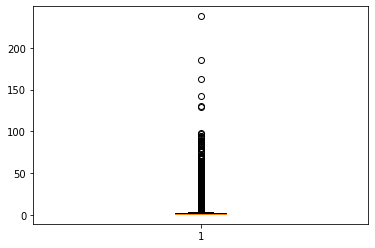

In [61]:
# no missing data in the main columns
# distribution for admissions per patients
plt.boxplot(df_admissions.groupby('subject_id')['hadm_id'].size());

In [62]:
#race distribution as pie, ignoring less than 1% (~1800)
import numpy as np
df_sub_race = df_admissions[['subject_id','race']].drop_duplicates(subset=['subject_id'])

In [63]:
# Combine races
df_sub_race['race'] = df_sub_race['race'].str.replace(r'(WHITE.*)','WHITE', regex=True)
df_sub_race['race'] = df_sub_race['race'].str.replace(r'(BLACK.*)','BLACK', regex=True)
df_sub_race['race'] = df_sub_race['race'].str.replace(r'(ASIAN.*)','ASIAN', regex=True)
df_sub_race['race'] = df_sub_race['race'].str.replace(r'(HISPANIC.*)','HISPANIC/LATINO', regex=True)
df_sub_race['race'] = df_sub_race['race'].str.replace('UNABLE TO OBTAIN','UNKNOWN', regex=True)
df_sub_race['race'] = df_sub_race['race'].str.replace('PATIENT DECLINED TO ANSWER','UNKNOWN', regex=True)
df_simplified_race = df_sub_race['race'].value_counts().reset_index()
df_simplified_race.columns = ['race', 'counts']
df_simplified_race

,race,counts
0,WHITE,120808
1,BLACK,23459
2,UNKNOWN,10113
3,HISPANIC/LATINO,9761
4,ASIAN,7552
5,OTHER,7464
6,PORTUGUESE,500
7,AMERICAN INDIAN/ALASKA NATIVE,387
8,MULTIPLE RACE/ETHNICITY,252
9,SOUTH AMERICAN,240


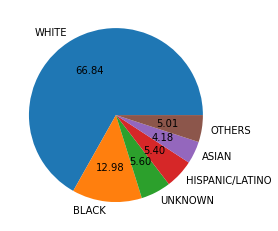

In [64]:
pd.options.mode.chained_assignment = None
if df_simplified_race['race'].str.contains('OTHERS').any()==False:
  df_simplified_race.iloc[5] = df_simplified_race.iloc[5:].sum()
  df_simplified_race['race'][5] = 'OTHERS'

plt.pie(df_simplified_race['counts'][:6], labels=df_simplified_race['race'][:6], autopct='%.2f');

In [17]:
#calculate length of stay per admission in hours
df_admissions['los'] = (pd.to_datetime(df_admissions['dischtime'])-pd.to_datetime(df_admissions['admittime']))/pd.Timedelta(hours=1)

In [18]:
df_diagnoses_icd=pd.read_csv('/content/gdrive/MyDrive/mimic-iv/diagnoses_icd.csv.gz')

In [19]:
df_merged = pd.merge(df_patients[['subject_id','gender','anchor_age']], df_admissions[['subject_id','hadm_id','los','admission_type','insurance','marital_status','race','hospital_expire_flag']], on='subject_id', how='inner')
df_merged

,subject_id,gender,anchor_age,hadm_id,los,admission_type,insurance,marital_status,race,hospital_expire_flag
0,10000032,F,52,22595853,18.866667,URGENT,Other,WIDOWED,WHITE,0
1,10000032,F,52,22841357,24.366667,EW EMER.,Medicaid,WIDOWED,WHITE,0
2,10000032,F,52,25742920,42.100000,EW EMER.,Medicaid,WIDOWED,WHITE,0
3,10000032,F,52,29079034,53.333333,EW EMER.,Medicaid,WIDOWED,WHITE,0
4,10000068,F,19,25022803,7.166667,EU OBSERVATION,Other,SINGLE,WHITE,0
...,...,...,...,...,...,...,...,...,...,...
431083,19999828,F,46,25744818,240.266667,EW EMER.,Other,SINGLE,WHITE,0
431084,19999828,F,46,29734428,409.783333,EW EMER.,Other,SINGLE,WHITE,0
431085,19999840,M,58,21033226,167.916667,EW EMER.,Other,WIDOWED,WHITE,1
431086,19999840,M,58,26071774,83.800000,EW EMER.,Other,WIDOWED,WHITE,0


In [20]:
df_merged.pop('subject_id')

0         10000032
1         10000032
2         10000032
3         10000032
4         10000068
            ...   
431083    19999828
431084    19999828
431085    19999840
431086    19999840
431087    19999987
Name: subject_id, Length: 431088, dtype: int64

In [22]:
df_merged.pop('hadm_id')

0         22595853
1         22841357
2         25742920
3         29079034
4         25022803
            ...   
431083    25744818
431084    29734428
431085    21033226
431086    26071774
431087    23865745
Name: hadm_id, Length: 431088, dtype: int64

In [23]:
df_merged

,gender,anchor_age,los,admission_type,insurance,marital_status,race,hospital_expire_flag
0,F,52,18.866667,URGENT,Other,WIDOWED,WHITE,0
1,F,52,24.366667,EW EMER.,Medicaid,WIDOWED,WHITE,0
2,F,52,42.100000,EW EMER.,Medicaid,WIDOWED,WHITE,0
3,F,52,53.333333,EW EMER.,Medicaid,WIDOWED,WHITE,0
4,F,19,7.166667,EU OBSERVATION,Other,SINGLE,WHITE,0
...,...,...,...,...,...,...,...,...
431083,F,46,240.266667,EW EMER.,Other,SINGLE,WHITE,0
431084,F,46,409.783333,EW EMER.,Other,SINGLE,WHITE,0
431085,M,58,167.916667,EW EMER.,Other,WIDOWED,WHITE,1
431086,M,58,83.800000,EW EMER.,Other,WIDOWED,WHITE,0


##Create a Test Set

In [24]:
import numpy as np
def shuffle_and_split_data(df_new, test_ratio):
  shuffled_indices = np.random.permutation(len(df_new))
  test_set_size = int(len(df_new) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return df_new.iloc[train_indices], df_new.iloc[test_indices]

In [25]:
train_set, test_set = shuffle_and_split_data(df_merged, 0.2)
print(len(train_set), len(test_set))

344871 86217


In [26]:
train_set

,gender,anchor_age,los,admission_type,insurance,marital_status,race,hospital_expire_flag
430422,F,38,12.650000,EU OBSERVATION,Other,MARRIED,WHITE,0
71435,M,25,20.100000,EU OBSERVATION,Other,SINGLE,WHITE,0
375769,F,48,7.066667,EU OBSERVATION,Other,WIDOWED,BLACK/AFRICAN AMERICAN,0
193444,F,53,18.533333,EU OBSERVATION,Other,SINGLE,BLACK/AFRICAN AMERICAN,0
98418,F,24,71.166667,OBSERVATION ADMIT,Other,SINGLE,NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,0
...,...,...,...,...,...,...,...,...
361184,M,82,132.783333,OBSERVATION ADMIT,Medicare,WIDOWED,WHITE,0
206299,M,52,80.083333,SURGICAL SAME DAY ADMISSION,Other,DIVORCED,WHITE,0
270923,F,64,185.583333,EW EMER.,Medicare,SINGLE,WHITE,0
200709,F,68,163.250000,DIRECT EMER.,Medicare,SINGLE,WHITE,0


Adding an idex column-

In [27]:
from zlib import crc32
def is_id_in_test_set(identifier, test_ratio):
  return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
  ids = data[id_column]
  in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_,test_ratio))
  return data.loc[~in_test_set], data.loc[in_test_set]

In [28]:
df_merged_with_id =df_merged.reset_index() # adds an `index` column
train_set, test_set = split_data_with_id_hash(df_merged_with_id, 0.2,"index")
print(len(train_set), len(test_set))

344872 86216


In [29]:
train_set

,index,gender,anchor_age,los,admission_type,insurance,marital_status,race,hospital_expire_flag
0,0,F,52,18.866667,URGENT,Other,WIDOWED,WHITE,0
1,1,F,52,24.366667,EW EMER.,Medicaid,WIDOWED,WHITE,0
3,3,F,52,53.333333,EW EMER.,Medicaid,WIDOWED,WHITE,0
4,4,F,19,7.166667,EU OBSERVATION,Other,SINGLE,WHITE,0
6,6,M,72,10.933333,EU OBSERVATION,Medicare,MARRIED,WHITE,0
...,...,...,...,...,...,...,...,...,...
431083,431083,F,46,240.266667,EW EMER.,Other,SINGLE,WHITE,0
431084,431084,F,46,409.783333,EW EMER.,Other,SINGLE,WHITE,0
431085,431085,M,58,167.916667,EW EMER.,Other,WIDOWED,WHITE,1
431086,431086,M,58,83.800000,EW EMER.,Other,WIDOWED,WHITE,0


In [30]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_merged, test_size=0.2, random_state=42)
train_set

,gender,anchor_age,los,admission_type,insurance,marital_status,race,hospital_expire_flag
274515,M,54,22.283333,EW EMER.,Medicare,DIVORCED,WHITE,0
262960,M,76,44.516667,EW EMER.,Medicare,MARRIED,WHITE,0
67770,M,43,3.133333,EU OBSERVATION,Other,MARRIED,WHITE,0
183371,F,23,72.300000,EW EMER.,Medicaid,SINGLE,BLACK/AFRICAN AMERICAN,0
301895,M,61,62.200000,EU OBSERVATION,Medicare,SINGLE,WHITE,0
...,...,...,...,...,...,...,...,...
259178,F,91,24.666667,EW EMER.,Medicare,WIDOWED,WHITE,0
365838,M,63,66.816667,EW EMER.,Medicare,DIVORCED,WHITE,0
131932,F,67,29.666667,DIRECT OBSERVATION,Medicare,SINGLE,WHITE,0
146867,F,69,117.333333,OBSERVATION ADMIT,Medicare,WIDOWED,OTHER,0


In [33]:
df=pd.DataFrame(train_set)

##Converting categorical data to numerical using OneHotEncoder

In [35]:
categorical_columns=df[['gender','admission_type','insurance','marital_status','race']]

In [38]:
df_num = df.select_dtypes(include=[np.number])

In [41]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(df_num)
df_num.median().values

array([58.        , 65.61666667,  0.        ])

In [65]:
X = imputer.transform(df_num)
df_tr = pd.DataFrame(X, columns=df_num.columns, index=df_num.index)
df_tr
df_label=df_tr['los']

In [36]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
cat = cat_encoder.fit_transform(categorical_columns)
cat.toarray()

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [66]:
cat

<344870x52 sparse matrix of type '<class 'numpy.float64'>'
	with 1724350 stored elements in Compressed Sparse Row format>

In [39]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
df_num_min_max_scaled = min_max_scaler.fit_transform(df_num)

In [40]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
df_num_std_scaled = std_scaler.fit_transform(df_num)

In [43]:
from sklearn.pipeline import make_pipeline
num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [44]:
from sklearn.compose import ColumnTransformer
num_attribs = ['anchor_age','los','hospital_expire_flag']
cat_attribs = ['gender','admission_type','insurance','marital_status','race']

cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore"))
preprocessing = ColumnTransformer([("num", num_pipeline, num_attribs),("cat", cat_pipeline, cat_attribs),])

In [45]:
from sklearn.compose import make_column_selector, make_column_transformer
preprocessing = make_column_transformer((num_pipeline, make_column_selector(dtype_include=np.number)),(cat_pipeline, make_column_selector(dtype_include=object)),)

In [51]:
df_prepared = preprocessing.fit_transform(df)
df_prepared.shape

(344870, 54)

In [54]:
df_prepared

<344870x54 sparse matrix of type '<class 'numpy.float64'>'
	with 2758960 stored elements in Compressed Sparse Row format>